***Mounting Drive***

<hr>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
import sys
print(sys.path)

['/tensorflow-1.15.0/python3.6', '', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython']


In [0]:
sys.path.append('/content/gdrive/My Drive/EVA/')
sys.path.append('/content/gdrive/My Drive/EVA/Models')
sys.path.append('/content/gdrive/My Drive/EVA/Transforms')

***Loading the python files from drive***


In [0]:
from imports_eva import *
import torch_transform as Tloader                 # Loading CIFAR10 data into train/test dataloaders
import resnet18 as mfile                          # ResNet18 Model architecture
import train_test_functions as ttfunc             # Model training and validation functions
import test_performance as tperform               # Class wise model accuracy and confusion matrix plot
import model_plots as mp                          # Plotting the Train/Test plots for loss and accuracy
import misclassified                              # Display misclassified images by the trained model
import Albumentation_transform as Aloader         # Albumentation transform

In [0]:
!pip install pytorch-gradcam
!pip install albumentations


***Loading CIFAR data and creating test/train loaders with augumentations***
<hr>

In [5]:
trainloader, testloader = Aloader.train_test_loaders(128)   #arguments are batchsize, rotation value

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Train Images count 50000
Test Images count 10000


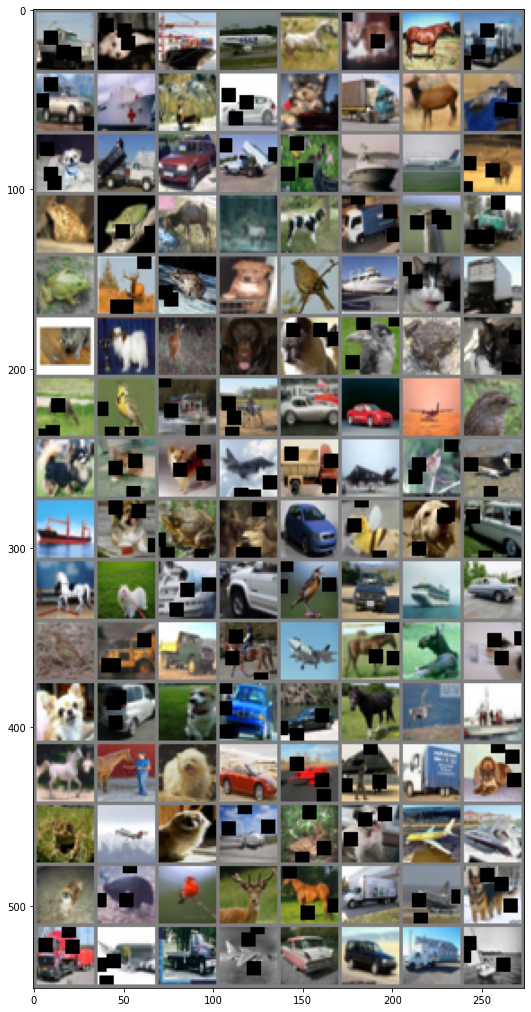

In [6]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(28,18))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

***Define the final target classes in CIFAR***


In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

***Load RESNET18 model and print summary***
<hr>

In [8]:
#!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = mfile.resnet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
         Dropout2d-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,864
       BatchNorm2d-5           [-1, 64, 32, 32]             128
         Dropout2d-6           [-1, 64, 32, 32]               0
            Conv2d-7           [-1, 64, 32, 32]          36,864
       BatchNorm2d-8           [-1, 64, 32, 32]             128
         Dropout2d-9           [-1, 64, 32, 32]               0
       BasicBlock-10           [-1, 64, 32, 32]               0
           Conv2d-11           [-1, 64, 32, 32]          36,864
      BatchNorm2d-12           [-1, 64, 32, 32]             128
        Dropout2d-13           [-1, 64, 32, 32]               0
           Conv2d-14           [-1

***Model Training***
---
<hr>

In [9]:
from torch.optim.lr_scheduler import MultiStepLR
train_acc = []
train_loss = []
val_acc = []
val_loss = []

model =  mfile.resnet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0001)
#scheduler = StepLR(optimizer, step_size=12, gamma=0.1)
#scheduler = ReduceLROnPlateau(optimizer, 'min', patience=3)
scheduler = MultiStepLR(optimizer, milestones=[17,22], gamma=0.1)

EPOCHS = 24
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    ta, tl   =  ttfunc.train(model, device, trainloader, optimizer, epoch)
    #train_acc.extend(ta)
    #train_loss.extend(tl)
    ta1, tl1 =  ttfunc.test(model, device, testloader, classes)
    #val_acc.extend(ta1)
    #val_loss.extend(tl1)
    scheduler.step()
    print('')

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.3948262929916382 Batch_id=390 Accuracy=38.45: 100%|██████████| 391/391 [00:31<00:00, 12.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0106, Accuracy: 5071/10000 (50.71%)


EPOCH: 2


Loss=1.0757333040237427 Batch_id=390 Accuracy=52.93: 100%|██████████| 391/391 [00:31<00:00, 12.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0083, Accuracy: 6302/10000 (63.02%)


EPOCH: 3


Loss=0.9199005365371704 Batch_id=390 Accuracy=62.19: 100%|██████████| 391/391 [00:31<00:00, 12.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 6898/10000 (68.98%)


EPOCH: 4


Loss=0.849989116191864 Batch_id=390 Accuracy=68.02: 100%|██████████| 391/391 [00:31<00:00, 12.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7507/10000 (75.07%)


EPOCH: 5


Loss=0.7554132342338562 Batch_id=390 Accuracy=72.16: 100%|██████████| 391/391 [00:31<00:00, 12.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7581/10000 (75.81%)


EPOCH: 6


Loss=0.5513595342636108 Batch_id=390 Accuracy=74.73: 100%|██████████| 391/391 [00:31<00:00, 12.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7832/10000 (78.32%)


EPOCH: 7


Loss=0.6458432078361511 Batch_id=390 Accuracy=76.81: 100%|██████████| 391/391 [00:31<00:00, 12.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8040/10000 (80.40%)


EPOCH: 8


Loss=0.5360523462295532 Batch_id=390 Accuracy=78.62: 100%|██████████| 391/391 [00:31<00:00, 12.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8208/10000 (82.08%)


EPOCH: 9


Loss=0.5684243440628052 Batch_id=390 Accuracy=80.21: 100%|██████████| 391/391 [00:31<00:00, 12.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8151/10000 (81.51%)


EPOCH: 10


Loss=0.8166564702987671 Batch_id=390 Accuracy=81.49: 100%|██████████| 391/391 [00:31<00:00, 12.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8404/10000 (84.04%)


EPOCH: 11


Loss=0.4726555347442627 Batch_id=390 Accuracy=82.61: 100%|██████████| 391/391 [00:32<00:00, 12.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8413/10000 (84.13%)


EPOCH: 12


Loss=0.5876569747924805 Batch_id=390 Accuracy=83.62: 100%|██████████| 391/391 [00:32<00:00, 12.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8435/10000 (84.35%)


EPOCH: 13


Loss=0.4808524549007416 Batch_id=390 Accuracy=84.53: 100%|██████████| 391/391 [00:31<00:00, 12.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8487/10000 (84.87%)


EPOCH: 14


Loss=0.453606516122818 Batch_id=390 Accuracy=85.52: 100%|██████████| 391/391 [00:31<00:00, 12.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8622/10000 (86.22%)


EPOCH: 15


Loss=0.3186863660812378 Batch_id=390 Accuracy=86.16: 100%|██████████| 391/391 [00:31<00:00, 12.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8562/10000 (85.62%)


EPOCH: 16


Loss=0.4241381585597992 Batch_id=390 Accuracy=86.98: 100%|██████████| 391/391 [00:31<00:00, 12.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8661/10000 (86.61%)


EPOCH: 17


Loss=0.6950053572654724 Batch_id=390 Accuracy=87.56: 100%|██████████| 391/391 [00:31<00:00, 12.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8701/10000 (87.01%)


EPOCH: 18


Loss=0.4540618062019348 Batch_id=390 Accuracy=90.33: 100%|██████████| 391/391 [00:31<00:00, 12.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8842/10000 (88.42%)


EPOCH: 19


Loss=0.2989608347415924 Batch_id=390 Accuracy=91.09: 100%|██████████| 391/391 [00:31<00:00, 12.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8873/10000 (88.73%)


EPOCH: 20


Loss=0.2554750144481659 Batch_id=390 Accuracy=91.42: 100%|██████████| 391/391 [00:31<00:00, 12.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8877/10000 (88.77%)


EPOCH: 21


Loss=0.21696043014526367 Batch_id=390 Accuracy=91.83: 100%|██████████| 391/391 [00:31<00:00, 12.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8876/10000 (88.76%)


EPOCH: 22


Loss=0.11218075454235077 Batch_id=390 Accuracy=92.25: 100%|██████████| 391/391 [00:31<00:00, 12.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8893/10000 (88.93%)


EPOCH: 23


Loss=0.14965422451496124 Batch_id=390 Accuracy=92.17: 100%|██████████| 391/391 [00:31<00:00, 12.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8897/10000 (88.97%)


EPOCH: 24


Loss=0.31349560618400574 Batch_id=390 Accuracy=92.23: 100%|██████████| 391/391 [00:31<00:00, 12.34it/s]



Test set: Average loss: 0.0028, Accuracy: 8897/10000 (88.97%)




In [0]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (d2): Dropout2d(p=0.05, inplace=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (d1): Dropout2d(p=0.15, inplace=False)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pad

***Checking test data performance/results***
<hr>

------------------------------------------------------------
Model accuracy on 10000 test images: 88.97%
------------------------------------------------------------
 
Category   - Accuracy
plane      - 92.20
car        - 95.40
bird       - 82.60
cat        - 73.20
deer       - 90.50
dog        - 82.60
frog       - 93.10
horse      - 92.40
ship       - 94.10
truck      - 93.60
 


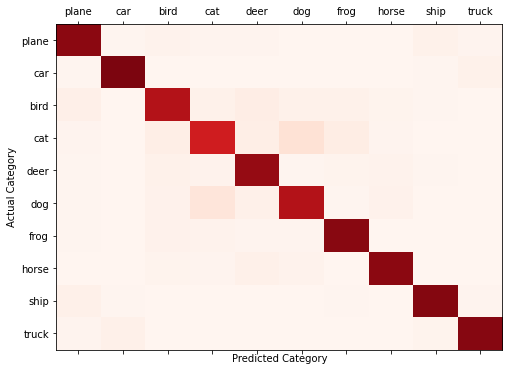

In [10]:
tperform.test_performance(model, testloader, device, classes)

***Show misclassified TEST images***
<hr>

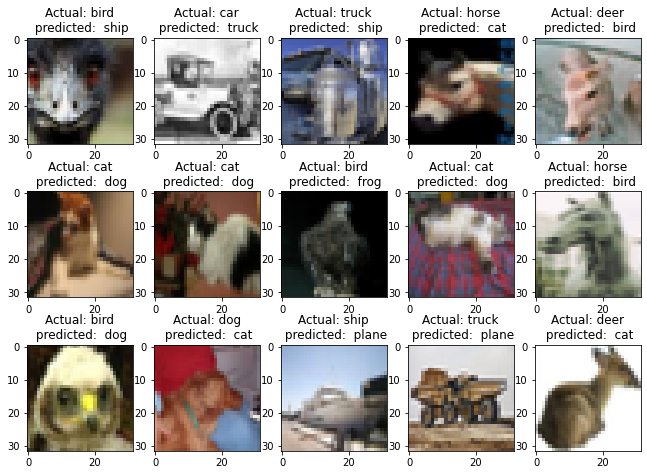

In [11]:
images, actuals, preds = misclassified.test_misclassified(model,device,testloader)
misclassified.plot_images(images, actuals, preds, classes)